# HW 3: Supervised Learning on the Bank Marketing Dataset

The original dataset is available here: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
We have a modified subset of this dataset to practice data  preprocessing. 

Perform the following tasks on the provided clean bank marketing dataset before encoding and scaling (bank-hw1.csv contains the dataset and bank-names.txt contains the description of the original dataset). 
* Complete all the [LP] questions to receive a "low pass" grade on the homework. 
* Complete all the [LP] questions and [HP 1] and [HP 2] to receive a "high pass" grade on the homework. 
* Passing the question marked [HP+] is not required to receive a "high pass" grade. However, it is necessary for an A+ in the course.

Note that if you are unable to complete any of the LP questions satisfactorily, you will receive a grade of "revision required". You can revise and resubmit your work in exchange for a token. Please review the syllabus for more information on specifications grading.

**VERY IMPORTANT**: Include **ALL** the references you used for this assignment, including names of classmates you discuss with. Failure to cite your sources counts as an act of academic dishonesty and will be taken seriously without zero tolerance. You will automatically receive a “fail” grade in the homework and further serious penalties may be imposed.

NOTE: You can look for help on the Internet but refrain from referencing too much. Please cite all your sources in your submission. 
When you submit your assignment, you automatically agree to the following statement. If you do not agree, it is your responsibility to provide the reason.

“*I affirm that I have neither given nor received unauthorized help in completing this homework. I am not aware of others receiving such help. I have cited all the sources in the solution file.*”

[LP 1] Import the provided clean data file, your preprocessed dataset from HW1, or clean the dataset here. Extract the following columns:

1. duration: all entries must be non-negative
2. campaign
3. pdays
4. previous

The set of values in each column and their meaning is provided in the bank-names.txt file. You can use the information to make decisions. Please explain your choices if you are preprocessing the dataset again here OR comment that you are using your preprocessed dataset from HW1. 

**Q1. How do you figure out if the dataset is imbalanced?**

First, make sure you have a balanced dataset to work with. A balanced dataset is one where there are an equal number of positive and negative samples. Find if the bank marketing dataset is imbalanced. 


**Q2. Balance this dataset.**
You are recommended to use a Random [Undersampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html). Sample code is provided below. 

In [82]:
import pandas as pd
##Replace path with your file location
path = '../HW3/bank-hw2-clean.csv'
bank = pd.read_csv(path, header=0) 
X = bank.values
y = bank[["y"]]

In [66]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)

In [83]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        2251 non-null   float64
 1   job        2251 non-null   object 
 2   marital    2251 non-null   object 
 3   education  2251 non-null   object 
 4   default    2251 non-null   object 
 5   balance    2251 non-null   int64  
 6   housing    2251 non-null   object 
 7   loan       2251 non-null   object 
 8   contact    2251 non-null   object 
 9   day        2251 non-null   int64  
 10  month      2251 non-null   object 
 11  duration   2251 non-null   float64
 12  campaign   2251 non-null   float64
 13  pdays      2251 non-null   float64
 14  previous   2251 non-null   int64  
 15  poutcome   2251 non-null   object 
 16  y          2251 non-null   object 
dtypes: float64(4), int64(3), object(10)
memory usage: 299.1+ KB


In [68]:
# Your code for LP1 goes here
# Feel free to add cells below this for LP1

In [84]:
(bank['duration'].value_counts()<0).sum()

0

In [85]:
bank_select = ['duration', 'campaign', 'pdays', 'previous']
bank_new = bank[bank_select]
bank_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2251 entries, 0 to 2250
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  2251 non-null   float64
 1   campaign  2251 non-null   float64
 2   pdays     2251 non-null   float64
 3   previous  2251 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 70.5 KB


In [86]:
bank_new.isna().sum()

duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [90]:
X = bank_new.values
y = bank['y']

(array([1992.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         259.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

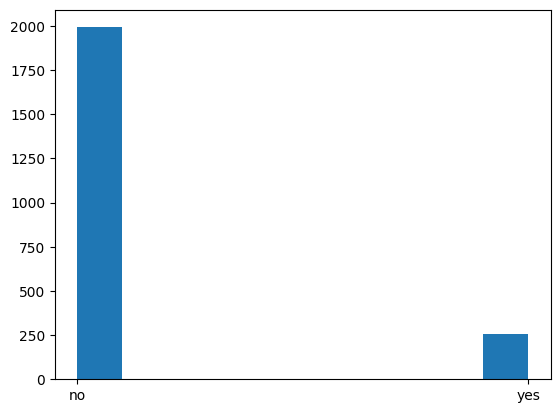

In [91]:
from matplotlib import pyplot as plt


plt.hist(y)

In [92]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)

In [93]:
X_under

array([[575.,   4.,  -1.,   0.],
       [129.,   2.,  -1.,   0.],
       [374.,   2.,  -1.,   0.],
       ...,
       [331.,   2.,  -1.,   0.],
       [216.,   1.,  -1.,   0.],
       [ 93.,   1.,  91.,   9.]])

In [94]:
y_under

0       no
1       no
2       no
3       no
4       no
      ... 
513    yes
514    yes
515    yes
516    yes
517    yes
Name: y, Length: 518, dtype: object

(array([259.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 259.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

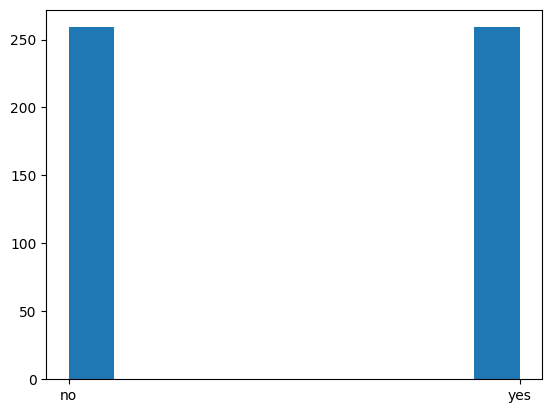

In [95]:
plt.hist(y_under)

In [101]:
y_under.value_counts()

no     259
yes    259
Name: y, dtype: int64

[HP+] Comment on why the undersampler might be okay for this dataset. If not, feel free to choose a different technique and discuss the reason why you choose it. 

<Your answer for HP+ goes here>

### HP+ 

After plotting the class distribution using a histogram for the target, we can see that the dataset is imbalanced. Class "No" is oversampled in comparison to class "No" which is undersampled. For this dataset to be balanced, we can use the Random Undersampler to undersample Class "No" provided by the professor as an example. 

After using Randmon UnderSampler we can see that both classes have even distributions with 259 samples each. 

[LP 2] Prepare the data by splitting into training and test datasets to perform supervised learning on this filtered dataset. 

In [ ]:
# Your code for LP2 goes here
# Feel free to add cells below this for LP2

In [124]:
from sklearn.model_selection import train_test_split
#doing a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X_under,y_under,test_size=0.30)

In [125]:
X_train.shape

(362, 4)

In [126]:
X_test.shape

(156, 4)

[LP 3] Build a decision tree on the training dataset upto a maximum depth of 3 with the entropy as the criterion and plot the decision tree. Plot the decision tree. Feel free use the example code from the class on the Iris dataset. 

In [127]:
# Your code for LP3 goes here
# Feel free to add cells below this for LP3
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [128]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(200,200))
fig = plot_tree(dt_clf, feature_names=bank_select)

[HP 1] Are there any leaf nodes with an entropy > 0? If so, what does it mean? How does this model perform on the test dataset? Provide an example on how the results for a single sample can be interpreted.

In [ ]:
# Your code for HP1 goes here
# Feel free to add cells below this for HP1

### HP1 ANS:

* Yes, there are 7 leaf nodes with entropy > 7 after applying max depth of 3 on the decision tree classifier. This means that these nodes need further splitting as they are impure with low information gain since their entropies are greater than 0. 

* On the test dataset, the model is able to get an accuracy of 73%. The test dataset has a total of 156 samples. The predicted "No" and actual "no" samples = 50. The predicted "no" and actual "yes" = 14. The predicted "yes" and actual "no" = 28. The predicted "yes" and actual "yes" = 64. We can see that class "no" was misclassified as class "yes" 14 times and class "yes" was misclassified as "no" 28 times. 

In [129]:
from sklearn.metrics import confusion_matrix
y_pred = dt_clf.predict(X_test)
print("Accuracy: ", dt_clf.score(X_test, y_test))
print("Confusion Matrix: ")
confusion_matrix(y_test, y_pred)


Accuracy:  0.7307692307692307
Confusion Matrix: 


array([[50, 28],
       [14, 64]], dtype=int64)

[LP 4] Perform grid search with cross-validation to determine the best decision tree for the dataset and decide between the following hyperparamters:
  min_samples_split = [4, 10, 20]
  max_depth = [3, 4, 5]
Plot the best performing model.

In [ ]:
# Your code for LP4 goes here
# Feel free to add cells below this for LP4

[HP 2] Interpret the results of grid search CV for the decision tree and comment on the following:
1. How does the model perform on the test dataset? 
2. Based on the confusion matrix for the best performing model, do you think the model performs satisfactorily for the application?


In [ ]:
# Your code for HP2 goes here
# Feel free to add cells below this for HP2

< Your answer for HP2 goes here >

# References
Include ALL your references here. 

# What to turn in:
1. The ipynb solution file, which includes the references
2. If you use Colab or GitHub for version control, please share a link to your notebook or GitHub repository